<a href="https://colab.research.google.com/github/sanika-mhadgut/Deep_Learning/blob/master/J031_J2_test1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARNING TEST 1

### NAME : SANIKA MHADGUT
### BATCH : BTECH DS J2
### DATE : 15/1/2020

In [0]:
from keras import optimizers
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)


In [0]:


NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

# Q. 1 - Download Mnist dataset

In [0]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 28, 28)
Train labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)
Train labels: [5 0 4 ... 5 6 8]
Test labels: [7 2 1 ... 4 5 6]


In [0]:
# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Check state of dataset
data_summary(X_train, y_train, X_test, y_test)

Train images shape: (60000, 784)
Train labels shape: (60000, 10)
Test images shape: (10000, 784)
Test labels shape: (10000, 10)
Train labels: [[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
Test labels: [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Q. 2 - Build Neural Network CV

# Optimizer as rmsprop doesnt give 100% so we try using adamax optimizer



In [0]:
# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 8s 134us/step - loss: 0.2388 - acc: 0.9296 - val_loss: 0.1278 - val_acc: 0.9629
Epoch 2/10
60000/60000 [==============================] - 7s 118us/step - loss: 0.0994 - acc: 0.9706 - val_loss: 0.0850 - val_acc: 0.9738
Epoch 3/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0648 - acc: 0.9806 - val_loss: 0.0770 - val_acc: 0.9762
Epoch 4/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0464 - acc: 0.9859 - val_loss: 0.0650 - val_acc: 0.9790
Epoch 5/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0330 - acc: 0.9899 - val_loss: 0.0642 - val_acc: 0.9805
Epoch 6/10
60000/60000 [==============================] - 7s 116us/step - loss: 0.0249 - acc: 0.9925 - val_loss: 0.0577 - val_acc: 0.9821
Epoch 7/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0171 - acc: 0.9954 - val_loss: 0.0636 - 

In [0]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.06393647281026933
Test accuracy: 0.9818


## Q. 4 - Model summary

In [0]:
# Summary of neural network
model.summary()#adamax 

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_44 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_45 (Dense)             (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


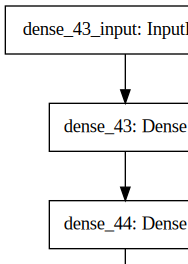

In [0]:
# Output network visualization
SVG(model_to_dot(model).create(prog='dot', format='svg'))

# Q. 3 - History

In [0]:
# training
history = model.fit(X_train, y_train,
                        batch_size=128,
                        nb_epoch=10,
                        verbose=1,
                        validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1152/60000 [..............................] - ETA: 7s - loss: 0.0037 - acc: 0.9991

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


60000/60000 [==============================] - 7s 115us/step - loss: 0.0042 - acc: 0.9993 - val_loss: 0.0572 - val_acc: 0.9841
Epoch 2/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0029 - acc: 0.9996 - val_loss: 0.0615 - val_acc: 0.9854
Epoch 3/10
60000/60000 [==============================] - 7s 117us/step - loss: 0.0025 - acc: 0.9996 - val_loss: 0.0633 - val_acc: 0.9852
Epoch 4/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.0016 - acc: 0.9999 - val_loss: 0.0676 - val_acc: 0.9831
Epoch 5/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0014 - acc: 0.9998 - val_loss: 0.0768 - val_acc: 0.9824
Epoch 6/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.0650 - val_acc: 0.9844
Epoch 7/10
60000/60000 [==============================] - 7s 115us/step - loss: 4.6124e-04 - acc: 1.0000 - val_loss: 0.0663 - val_acc: 0.9842
Epoch 8/10
60000/60000 [=================

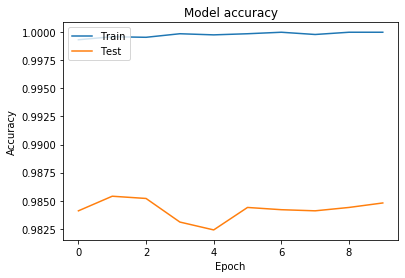

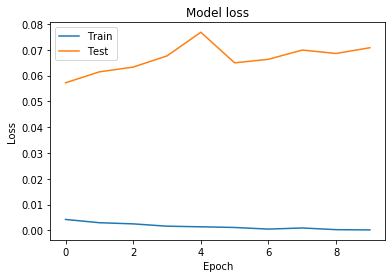

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Download Fashion MNIST dataset

In [0]:
from keras.datasets import fashion_mnist
from keras.datasets import cifar10
from keras.datasets import cifar100
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [0]:
from keras import optimizers
import keras
from keras import models
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
adamax=keras.optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999)
# Compile model using above optimizer

NUM_ROWS = 28
NUM_COLS = 28
NUM_CLASSES = 10
BATCH_SIZE = 128
EPOCHS = 10

# Load data
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Reshape data
X_train = X_train.reshape((X_train.shape[0], NUM_ROWS * NUM_COLS))
X_train = X_train.astype('float32') / 255
X_test = X_test.reshape((X_test.shape[0], NUM_ROWS * NUM_COLS))
X_test = X_test.astype('float32') / 255

# Categorically encode labels
y_train = to_categorical(y_train, NUM_CLASSES)
y_test = to_categorical(y_test, NUM_CLASSES)

# Build neural network
model = models.Sequential()
model.add(Dense(512, activation='relu', input_shape=(NUM_ROWS * NUM_COLS,)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.compile(optimizer=adamax,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(X_train, y_train,
          batch_size=BATCH_SIZE,
          epochs=EPOCHS,
          verbose=1,
          validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

4423680/4422102 [==============================] - 1s 0us/step
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 125us/step - loss: 0.4931 - acc: 0.8272 - val_loss: 0.4231 - val_acc: 0.8512
Epoch 2/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.3664 - acc: 0.8676 - val_loss: 0.3924 - val_acc: 0.8613
Epoch 3/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.3279 - acc: 0.8808 - val_loss: 0.3575 - val_acc: 0.8719
Epoch 4/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.3038 - acc: 0.8888 - val_loss: 0.3625 - val_acc: 0.8682
Epoch 5/10
60000/60000 [==============================] - 7s 111us/step - loss: 0.2856 - acc: 0.8942 - val_loss: 0.3302 - val_acc: 0.8810
Epoch 6/10
60000/60000 [==============================] - 7s 112us/step - loss: 0.2681 - acc: 0.9013 - val_loss: 0.3254 - val_acc: 0.8800
Epoch 7/10
60000/60000 [==============================] - 7

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
 1664/60000 [..............................] - ETA: 6s - loss: 0.2026 - acc: 0.9189

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


60000/60000 [==============================] - 7s 112us/step - loss: 0.2103 - acc: 0.9216 - val_loss: 0.3128 - val_acc: 0.8906
Epoch 2/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.2010 - acc: 0.9244 - val_loss: 0.3131 - val_acc: 0.8910
Epoch 3/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.1920 - acc: 0.9269 - val_loss: 0.3079 - val_acc: 0.8932
Epoch 4/10
60000/60000 [==============================] - 7s 114us/step - loss: 0.1851 - acc: 0.9307 - val_loss: 0.3152 - val_acc: 0.8899
Epoch 5/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1756 - acc: 0.9342 - val_loss: 0.3193 - val_acc: 0.8899
Epoch 6/10
60000/60000 [==============================] - 7s 113us/step - loss: 0.1701 - acc: 0.9358 - val_loss: 0.3150 - val_acc: 0.8973
Epoch 7/10
60000/60000 [==============================] - 7s 115us/step - loss: 0.1629 - acc: 0.9392 - val_loss: 0.3264 - val_acc: 0.8934
Epoch 8/10
60000/60000 [=====================

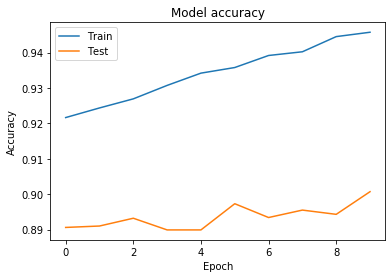

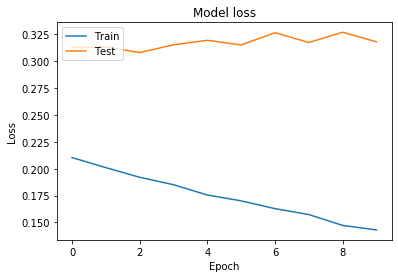

In [0]:
# training
history = model.fit(X_train, y_train,
                        batch_size=128,
                        nb_epoch=10,
                        verbose=1,
                        validation_data=(X_test, y_test))

import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Download Cifar10

In [0]:
#import packages
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.utils import to_categorical

#import dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

#change shape from image to vector
X_train = X_train.reshape(50000, 32 * 32 * 3)
X_test = X_test.reshape(10000, 32 * 32 * 3)

#preprocess
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

#change labels from numeric to one hot encoded
Y_train = to_categorical(y_train, 10)
Y_test =  to_categorical(y_test, 10)

model2=Sequential()
#model2.add(Dense(1024,activation='relu',input_shape=(3072, )))
#model2.add(Dense(512,activation='relu'))
#model2.add(Dense(512,activation='relu'))
#model2.add(Dense(1024,activation='softmax'))
model2.add(Dense(1024, input_shape=(3072, )))
model2.add(Activation('relu'))
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(512))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam' , metrics=['accuracy'])
#model2.fit(X_train,y_train, batch_size=128,nb_epoch=10 , verbose=1,validation_data=(X_test, Y_test))
#history=model2.fit(X_train, Y_train,batch_size=128, nb_epoch=10,verbose=1,validation_data=(X_test, Y_test))

model = Sequential()
model.add(Dense(1024, input_shape=(3072, )))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    
 

# training
history = model.fit(X_train, Y_train,
                        batch_size=128,
                        nb_epoch=10,
                        verbose=1,
                        validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:61: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 37s 743us/step - loss: 1.8648 - acc: 0.3204 - val_loss: 1.7829 - val_acc: 0.3577
Epoch 2/10
50000/50000 [==============================] - 36s 717us/step - loss: 1.6619 - acc: 0.4023 - val_loss: 1.6326 - val_acc: 0.4086
Epoch 3/10
50000/50000 [==============================] - 36s 727us/step - loss: 1.5746 - acc: 0.4351 - val_loss: 1.5283 - val_acc: 0.4561
Epoch 4/10
50000/50000 [==============================] - 36s 722us/step - loss: 1.5146 - acc: 0.4577 - val_loss: 1.5526 - val_acc: 0.4466
Epoch 5/10
50000/50000 [==============================] - 36s 725us/step - loss: 1.4656 - acc: 0.4762 - val_loss: 1.4674 - val_acc: 0.4783
Epoch 6/10
50000/50000 [==============================] - 36s 719us/step - loss: 1.4244 - acc: 0.4893 - val_loss: 1.4516 - val_acc: 0.4802
Epoch 7/10
50000/50000 [==============================] - 36s 720us/step - loss: 1.3813 - acc: 0.5079 - val_loss: 1.

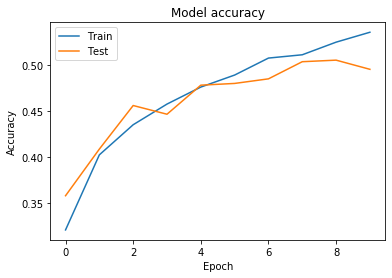

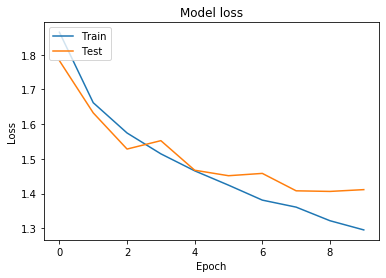

In [0]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()